In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 978.1+ KB


In [4]:
train_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [5]:
train_df.drop(["casual", "registered"], axis = 1, inplace = True)
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [6]:
train_df['datetime'] = pd.to_datetime(train_df['datetime'])
test_df['datetime'] = pd.to_datetime(test_df['datetime'])

In [7]:
train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['hour'] = train_df['datetime'].dt.hour
train_df['DayOfWeek'] = train_df['datetime'].dt.dayofweek

test_df['year'] = test_df['datetime'].dt.year
test_df['month'] = test_df['datetime'].dt.month
test_df['hour'] = test_df['datetime'].dt.hour
test_df['DayOfWeek'] = test_df['datetime'].dt.dayofweek

train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,hour,DayOfWeek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,4,5


In [8]:
trainX_df = train_df.drop(["datetime",'count'], axis = 1)
trainX_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,DayOfWeek
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,2011,1,4,5


In [9]:
testX_df = test_df.drop(["datetime"], axis = 1)
testX_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,DayOfWeek
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,4,3


In [10]:
trainY_df = train_df["count"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(trainX_df, trainY_df, test_size = 0.3, random_state = 42)

In [12]:
linearRegressor = LinearRegression()
linearRegressor.fit(X_train,y_train)
y_train_predicted = linearRegressor.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_train_predicted)))

141.2917801343724


Text(0, 0.5, 'Predicted')

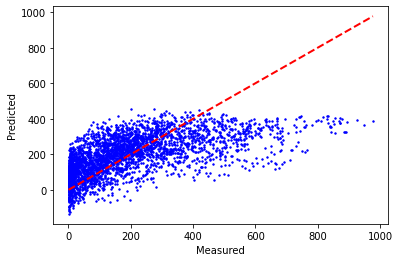

In [19]:
fig, plot = plt.subplots()
plot.scatter(y_test, y_train_predicted, s=2, color = 'b')
plot.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color = 'r', lw=2)
plot.set_xlabel('Measured')
plot.set_ylabel('Predicted')

In [20]:
RidgeRegressor = Ridge()
RidgeRegressor.fit(X_train,y_train)
y_train_predicted_Ridge = RidgeRegressor.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_train_predicted_Ridge)))

141.29214881714847


Text(0, 0.5, 'Predicted')

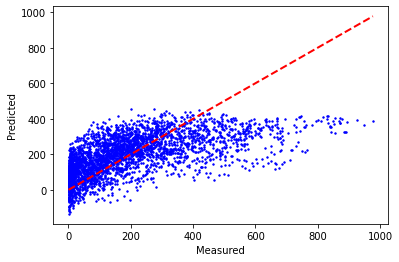

In [25]:
fig, plot = plt.subplots()
plot.scatter(y_test, y_train_predicted_Ridge, s=2, color = 'b')
plot.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color = 'r', lw=2)
plot.set_xlabel('Measured')
plot.set_ylabel('Predicted')

In [22]:
RFR = RandomForestRegressor(n_estimators = 500, min_samples_leaf = 5, random_state = 42)
RFR.fit(X_train,y_train)
y_train_predicted_RFR = RFR.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_train_predicted_RFR)))

42.680966509927096


Text(0, 0.5, 'Predicted')

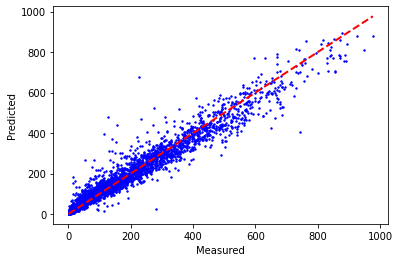

In [26]:
fig, plot = plt.subplots()
plot.scatter(y_test, y_train_predicted_RFR, s=2, color = 'b')
plot.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color = 'r', lw=2)
plot.set_xlabel('Measured')
plot.set_ylabel('Predicted')

In [15]:
predicted_count_RFR = RFR.predict(testX_df)
predicted_count_RFR

array([ 12.11592419,   5.58755052,   3.07155674, ..., 142.89946697,
       110.70950424,  79.80232925])

In [17]:
sample_submission = pd.read_csv('sampleSubmission.csv')
# RFR = RandomForestRegressor(n_estimators = 500, min_samples_leaf = 5, random_state = 42)
# RFR.fit(X_train,y_train)
predicted_count_RFR = RFR.predict(testX_df)
sample_submission['count'] = pd.Series(predicted_count_RFR.clip(0))
sample_submission.to_csv('Output3.csv', index = False)